In [18]:
import xarray as xr
import numpy as np 
from matplotlib import pyplot as plt
from matplotlib import cm
#from colorspacious import cspace_converter
from collections import OrderedDict

In [6]:
### Let's look at the net primary production which is primary production - respiration (in this case AOU)

##First we're going to load in the PRIMARY PRODUCTION data

rootdir = '/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/'

# Annual data 
datadir_ann = 'ocean_cobalt_omip_rates_year_z/ts/annual/5yr/'
filename_ann_pp = 'ocean_cobalt_omip_rates_year_z.0711-0715.pp.nc'
filename_ann_vol = 'ocean_cobalt_omip_rates_year_z.0711-0715.volcello.nc'

datadir_temp = 'ocean_annual_z/ts/annual/5yr/'
filename_temp = 'ocean_annual_z.0711-0715.thetao.nc'

# Monthly data
datadir_mon_bgc = 'ocean_cobalt_omip_tracers_month_z/av/monthly_5yr/'
filename_mon_bgc = 'ocean_cobalt_omip_tracers_month_z.0711-0715.*.nc'


datadir_mon_phys = 'ocean_monthly_z/av/monthly_5yr/'
filename_mon_phys = 'ocean_monthly_z.0711-0715.*.nc'

In [7]:
## Now we're going to open the datasets for PRIMARY PRODUCTION

#Annual data

bgc_ann_pp = xr.open_dataset(rootdir+datadir_ann+filename_ann_pp)
phys_ann_vol = xr.open_dataset(rootdir+datadir_ann+filename_ann_vol)
temp_ann = xr.open_dataset(rootdir+datadir_temp+filename_temp)

#Monthly data

bgc_mon_variables = xr.open_mfdataset(rootdir+datadir_mon_bgc+filename_mon_bgc)
phys_mon_variables = xr.open_mfdataset(rootdir+datadir_mon_phys+filename_mon_phys)

/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/xarray/coding/times.py:419: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  self.use_cftime)


In [8]:
##### STILL PRIMARY PRODUCTION! 

# Annual data

ds = xr.merge([bgc_ann_pp, phys_ann_vol, temp_ann])

# Monthly data 

dt = xr.merge([bgc_mon_variables.pp, phys_mon_variables.thetao, bgc_mon_variables.volcello])

/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/numpy/core/numeric.py:538: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/numpy/core/numeric.py:538: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/numpy/core/numeric.py:538: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/pyt

In [9]:
# Annual primary production x volume variable 

pV_ann = ds.pp * ds.volcello
pV_ann.name = 'pV_ann'
ds = xr.merge([ds, pV_ann])

# Monthly primary production x volume variable 

pV_mon = dt.pp * dt.volcello
pV_mon.name = 'pV_mon'
dt = xr.merge([dt, pV_mon])

In [12]:
##### And then the RESPIRATION (AOU) data

datadir_ann = 'ocean_cobalt_omip_tracers_year_z/ts/annual/5yr/'
filename_ann_o2 = 'ocean_cobalt_omip_tracers_year_z.0711-0715.o2.nc'
filename_ann_o2sat = 'ocean_cobalt_omip_tracers_year_z.0711-0715.o2sat.nc'
filename_ann_vol = 'ocean_cobalt_omip_tracers_year_z.0711-0715.volcello.nc'

datadir_temp = 'ocean_annual_z/ts/annual/5yr/'
filename_temp = 'ocean_annual_z.0711-0715.thetao.nc'

## MONTHLY respiration 

datadir_mon_aou = 'ocean_cobalt_omip_tracers_month_z/av/monthly_5yr/'
filename_mon_aou = 'ocean_cobalt_omip_tracers_month_z.0711-0715.*.nc'


datadir_mon_temp = 'ocean_monthly_z/av/monthly_5yr/'
filename_mon_temp = 'ocean_monthly_z.0711-0715.*.nc'



In [13]:
# Annual AOU data 

aou_ann_o2 = xr.open_dataset(rootdir+datadir_ann+filename_ann_o2)
aou_ann_o2sat = xr.open_dataset(rootdir+datadir_ann+filename_ann_o2sat)
aou_ann_vol = xr.open_dataset(rootdir+datadir_ann+filename_ann_vol)

aou_ann_temp = xr.open_dataset(rootdir+datadir_temp+filename_temp)

# Monthly AOU data

aou_mon_variables = xr.open_mfdataset(rootdir+datadir_mon_aou+filename_mon_aou)
aou_mon_temp = xr.open_mfdataset(rootdir+datadir_mon_temp+filename_mon_temp)

/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/xarray/coding/times.py:419: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  self.use_cftime)


In [14]:
# Annual AOU dataset

dm = xr.merge([aou_ann_o2, aou_ann_o2sat, aou_ann_vol, aou_ann_temp])

# Monthly AOU dataset

do = xr.merge([aou_mon_variables.o2, aou_mon_variables.o2sat, aou_mon_variables.volcello, aou_mon_temp.thetao])

/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/numpy/core/numeric.py:538: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/numpy/core/numeric.py:538: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/numpy/core/numeric.py:538: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/pyt

In [15]:
# Annual amount of moles of oxygen/saturated oxygen 

o2V_ann = dm.o2 * dm.volcello
o2V_ann.name = 'o2V_ann'

o2satV_ann = dm.o2sat * dm.volcello
o2satV_ann.name = 'o2satV_ann'

AOU_ann = o2satV_ann - o2V_ann 
AOU_ann.name = 'AOU_ann'

dm = xr.merge([dm, AOU_ann])


# Monthly amount of moles of oxygen/saturdated oxygen

o2V_mon = do.o2 * do.volcello
o2V_mon.name = 'o2V_mon'

o2satV_mon = do.o2sat * do.volcello
o2satV_mon.name = 'o2satV_mon'

AOU_mon = o2satV_mon - o2V_mon 
AOU_mon.name = 'AOU_mon'

do = xr.merge([do, AOU_mon])

In [23]:
# Annual temperature binning for PRIMARY PRODUCTION 

##ds = ds.set_coords('thetao')

# Monthly temperature binning for PRIMARY PRODUCTION 

##dt = dt.set_coords('thetao')

#theta_bins = np.arange(-2,30,2)

# Annual temperature binning for RESPIRATION/AOU

##dm = dm.set_coords('thetao')

# Monthly temperature binning for RESPIRATION/AOU

##do = do.set_coords('thetao')

##theta_bins = np.arange(-2,30,2)

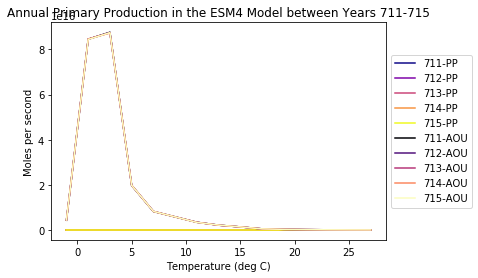

In [21]:
###### Okay so I first want to look at a graph of...
###### ...primary production and respiration on one single graph

## Let's start off with ANNUAL measurements 

labels_pp = ["711-PP", "712-PP", "713-PP", "714-PP", "715-PP"]
colors_pp = cm.get_cmap('plasma',5).colors 

for t in range(5):

    pV_in_theta = ds.pV_ann.isel(time=t,yh=range(0,576)).groupby_bins('thetao',theta_bins)
 
    p_vsum = pV_in_theta.sum(xr.ALL_DIMS)
    
    p_vsum.plot(label=labels_pp[t], color=colors_pp[t,:])
    


labels_AOU = ["711-AOU", "712-AOU", "713-AOU", "714-AOU", "715-AOU"]
colors_AOU = cm.get_cmap('magma',5).colors 

for i in range(5):

    AOU_ann_in_theta = dm.AOU_ann.isel(time=i,yh=range(0,576)).groupby_bins('thetao',theta_bins)
 
    p_vsum = AOU_ann_in_theta.sum(xr.ALL_DIMS)
    
    p_vsum.plot(label=labels_AOU[i], color=colors_AOU[i,:])
       
       
    
plt.title('Annual Primary Production in the ESM4 Model between Years 711-715')
plt.xlabel('Temperature (deg C)')
plt.ylabel('Moles per second')
plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))


In [ ]:
## Okay...
## I honestly think this is what all of the graphs (monthly and hemispherical) will look lik
##.. so I won't bother!

In [25]:
## Alrighty I'm going to move on with NPP 
# NPP = PRIMARY PRODUCTION - RESPIRATION (AOU)
## Of course let's start with ANNUAL!

npp_ann = pV_ann - AOU_ann
npp_ann.name = 'npp_ann'

da = xr.merge([ds, dm, npp_ann ])

theta_bins_ann = np.arange(-2,30,2)

In [26]:
da

<xarray.Dataset>
Dimensions:     (nv: 2, time: 5, xh: 720, yh: 576, z_i: 36, z_l: 35)
Coordinates:
  * nv          (nv) float64 1.0 2.0
  * time        (time) object 0711-07-02 12:00:00 ... 0715-07-02 12:00:00
  * xh          (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh          (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * z_i         (z_i) float64 0.0 5.0 15.0 25.0 ... 5.75e+03 6.25e+03 6.75e+03
  * z_l         (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
    thetao      (time, z_l, yh, xh) float32 nan nan nan nan ... nan nan nan nan
Data variables:
    average_DT  (time) timedelta64[ns] 365 days 365 days ... 365 days 365 days
    average_T1  (time) object 0710-07-08 00:00:00 ... 0714-07-07 00:00:00
    average_T2  (time) object 0711-07-08 00:00:00 ... 0715-07-07 00:00:00
    pp          (time, z_l, yh, xh) float32 ...
    time_bnds   (time, nv) object 0711-01-01 00:00:00 ... 0716-01-01 00:00:00
    volcello    (time, 

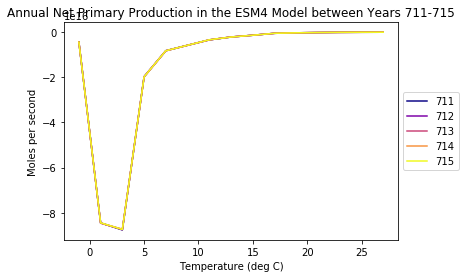

In [27]:
labels = ["711", "712", "713", "714", "715"]
colors = cm.get_cmap('plasma',5).colors 

for t in range(5):

    ppV_in_theta = da.npp_ann.isel(time=t,yh=range(0,576)).groupby_bins('thetao',theta_bins_ann)
 
    pp_vsum = ppV_in_theta.sum(xr.ALL_DIMS)
    
    pp_vsum.plot(label=labels[t], color=colors[t,:])
       
    
plt.title('Annual Net Primary Production in the ESM4 Model between Years 711-715')
plt.xlabel('Temperature (deg C)')
plt.ylabel('Moles per second')
plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))

In [37]:
## Interesante!!!!!
## Okay let's do this for each MONTH! 

npp_mon = (pV_mon - AOU_mon)
npp_mon.name = 'npp_mon'

dz = xr.merge([dt, do, npp_mon])

theta_bins_mon = np.arange(-2,30,2)

In [38]:
dz

<xarray.Dataset>
Dimensions:   (time: 12, xh: 720, yh: 576, z_l: 35)
Coordinates:
  * xh        (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh        (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * z_l       (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * time      (time) object 0715-01-16 12:00:00 ... 0715-12-16 12:00:00
    thetao    (time, z_l, yh, xh) float32 dask.array<shape=(12, 35, 576, 720), chunksize=(1, 35, 576, 720)>
Data variables:
    pp        (time, z_l, yh, xh) float32 dask.array<shape=(12, 35, 576, 720), chunksize=(1, 35, 576, 720)>
    volcello  (time, z_l, yh, xh) float32 dask.array<shape=(12, 35, 576, 720), chunksize=(1, 35, 576, 720)>
    pV_mon    (time, z_l, yh, xh) float32 dask.array<shape=(12, 35, 576, 720), chunksize=(1, 35, 576, 720)>
    o2        (time, z_l, yh, xh) float32 dask.array<shape=(12, 35, 576, 720), chunksize=(1, 35, 576, 720)>
    o2sat     (time, z_l, yh, xh) float32 dask.array<shap

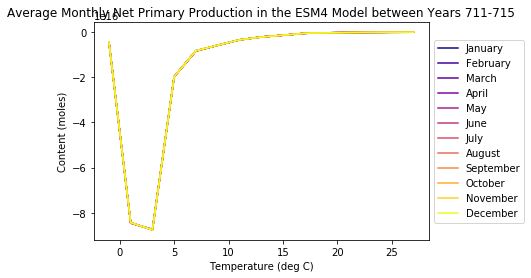

In [39]:
labels = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
colors = cm.get_cmap('plasma',12).colors 

for t in range(12):
    nppV_in_theta = dz.npp_mon.isel(time=t,yh=range(0,576)).groupby_bins('thetao',theta_bins_mon)
 
    npp_vsum = nppV_in_theta.sum(xr.ALL_DIMS) 

    npp_vsum.plot(label=labels[t], color=colors[t,:])
    
plt.title('Average Monthly Net Primary Production in the ESM4 Model between Years 711-715')
plt.xlabel('Temperature (deg C)')
plt.ylabel('Content (moles)')
plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))